<a href="https://colab.research.google.com/github/leesolhahaha/data-analysis-ta/blob/main/6_groupby%EC%82%AC%EC%9A%A9%ED%95%98%EC%97%AC%EC%A7%91%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 자료형 변환하기
* DataFrame객체(또는 Series객체).<b>`astype('새로운데이터타입이름')`</b>

* seaborn의 'tips' 데이터셋을 이용하여 자료형 변환을 해본다.

In [ ]:
# 판다스와 seaborn 라이브러를 임포트한다.

import pandas as pd
import seaborn as sns

In [ ]:
# seaborn의 'tips'데이터셋을 로드하고 데이터프레임 tips를 생성한다.

tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
# 데이터프레임 tips의 앞쪽 데이터를 확인

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# tips의 행열확인

tips.shape

(244, 7)

In [ ]:
# tips 각 열의 데이터 타입 확인

tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [ ]:
tips['smoker']

0       No
1       No
2       No
3       No
4       No
      ... 
239     No
240    Yes
241    Yes
242     No
243     No
Name: smoker, Length: 244, dtype: category
Categories (2, object): ['Yes', 'No']

In [ ]:
tips['smoker'][0]

'No'

In [ ]:
tips['smoker'].dtypes

CategoricalDtype(categories=['Yes', 'No'], ordered=False)

In [ ]:
# tips의 요약정보확인

tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
# 흡연여부를 나타내는 smoker열은 카테고리형이다. 이열을 문자열로 바꾸고 'smoker_str'열을 생성한다.

tips['smoker_str'] = tips['smoker'].astype('str')
tips['smoker_str']

0       No
1       No
2       No
3       No
4       No
      ... 
239     No
240    Yes
241    Yes
242     No
243     No
Name: smoker_str, Length: 244, dtype: object

In [ ]:
# tips의 각 열의데이터 타입을 확인

tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
smoker_str      object
dtype: object

In [ ]:
# 'total_bill'열의 데이터형을 문자열로 변환

tips['total_bill'] = tips['total_bill'].astype('str')
tips['total_bill']

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: object

In [ ]:
# tips의 각 열의데이터 타입을 확인

tips.dtypes

total_bill      object
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
smoker_str      object
dtype: object

In [ ]:
# 'total_bill'열의 데이터형을 실수형으로 변환

tips['total_bill'] = tips['total_bill'].astype('float')
tips['total_bill']

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

In [ ]:
# tips의 각 열의데이터 타입을 확인

tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
smoker_str      object
dtype: object

# 2 데이터프레임 열분리
 <b>`시리즈의 문자열 리스트 인덱싱 : 시리즈객체.str.get(인덱스)`</b>

- <u>하나의 열이 여러 가지 정보를 담고 있을 때 각 정보를 서로 분리해서 사용하는 경우</u>가 있다.
- 어떤 열에 '연월일' 정보가 있을때 '연', '월', '일'을 구분하여 3개의 열을 만드는 것이나, 사람의 이름이 들어 있는 열을 '성'과 '이름'을로 구분하는 것을 예로 들수 있다.

* '주가데이터.xlsx'파일(한국 주식시장에 상장된 모 회사의 날짜별 주가를 정리한 데이터)의 날짜데이터를 연,월,일로 분리해본다.

In [ ]:
# 판다스 라이브러리 임포트

import pandas as pd

In [ ]:
# './data/주가데이터.xlsx'파일을 읽어봐 데이터프레임 df를 생성한다.

df = pd.read_excel('/content/drive/MyDrive/데이터 분석 특강/ data/주가데이터.xlsx')
df

,연월일,당일종가,전일종가,시가,고가,저가,거래량
0,2018-07-02,10100,600,10850,10900,10000,137977
1,2018-06-29,10700,300,10550,10900,9990,170253
2,2018-06-28,10400,500,10900,10950,10150,155769
3,2018-06-27,10900,100,10800,11050,10500,133548
4,2018-06-26,10800,350,10900,11000,10700,63039
5,2018-06-25,11150,150,11400,11450,11000,55519
6,2018-06-22,11300,100,11250,11450,10750,134805
7,2018-06-21,11200,350,11350,11750,11200,133002
8,2018-06-20,11550,250,11200,11600,10900,308596
9,2018-06-19,11300,700,11850,11950,11300,180656


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 데이터프레임 df의 요약 정보를 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   연월일     20 non-null     datetime64[ns]
 1   당일종가    20 non-null     int64         
 2   전일종가    20 non-null     int64         
 3   시가      20 non-null     int64         
 4   고가      20 non-null     int64         
 5   저가      20 non-null     int64         
 6   거래량     20 non-null     int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 1.2 KB


## 2.1 Series.str
- <b>`시리즈의 값을 문자열로 접근하기 위해 사용되는 속성`</b>

* '연월일' 열의 내용을 분리해 '연','월','일' 3개의 열을 생성한다.

In [ ]:
# 문자열 메소드를 사용하기 위해 '연월일' 열의 자료형을 변경한다.
# 결과를 '연월일_str' 컬럼에 대입한다.

df['연월일_str'] = df['연월일'].astype('str')
df['연월일_str']

0     2018-07-02
1     2018-06-29
2     2018-06-28
3     2018-06-27
4     2018-06-26
5     2018-06-25
6     2018-06-22
7     2018-06-21
8     2018-06-20
9     2018-06-19
10    2018-06-18
11    2018-06-15
12    2018-06-14
13    2018-06-12
14    2018-06-11
15    2018-06-08
16    2018-06-07
17    2018-06-05
18    2018-06-04
19    2018-06-01
Name: 연월일_str, dtype: object

In [ ]:
# df의 요약정보확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   연월일      20 non-null     datetime64[ns]
 1   당일종가     20 non-null     int64         
 2   전일종가     20 non-null     int64         
 3   시가       20 non-null     int64         
 4   고가       20 non-null     int64         
 5   저가       20 non-null     int64         
 6   거래량      20 non-null     int64         
 7   연월일_str  20 non-null     object        
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 1.4+ KB


In [ ]:
'2023 11 21'.split()

['2023', '11', '21']

In [ ]:
'2023-11-21'.split('-')[2]

'21'

In [ ]:
# '연월일_str' 열의 문자열데이터를 split() 메소드로 분리하여 ['연','월', '일'] 형태의 리스트로 정리해서 dates변수에 대입

df['연월일_str'].str.split('-').str[0]
df['연월일_str'].str.split('-').str.get(0)

0     2018
1     2018
2     2018
3     2018
4     2018
5     2018
6     2018
7     2018
8     2018
9     2018
10    2018
11    2018
12    2018
13    2018
14    2018
15    2018
16    2018
17    2018
18    2018
19    2018
Name: 연월일_str, dtype: object

In [ ]:
# 분리된 정보를 각각 새로운 열에 담아 df에 추가하기
# dates에서 연정보를 추출하여 '연_str'컬럼에 대입

df['연_str'] = df['연월일_str'].str.split('-').str[0]
df['연_str']

0     2018
1     2018
2     2018
3     2018
4     2018
5     2018
6     2018
7     2018
8     2018
9     2018
10    2018
11    2018
12    2018
13    2018
14    2018
15    2018
16    2018
17    2018
18    2018
19    2018
Name: 연_str, dtype: object

In [ ]:
# 분리된 정보를 각각 새로운 열에 담아 df에 추가하기
# dates에서 월정보를 추출하여 '월_str'컬럼에 대입

df['월_str'] = df['연월일_str'].str.split('-').str[1]
df['월_str']

0     07
1     06
2     06
3     06
4     06
5     06
6     06
7     06
8     06
9     06
10    06
11    06
12    06
13    06
14    06
15    06
16    06
17    06
18    06
19    06
Name: 월_str, dtype: object

In [ ]:
# 분리된 정보를 각각 새로운 열에 담아 df에 추가하기
# dates에서 일정보를 추출하여 '일_str'컬럼에 대입

df['일_str'] = df['연월일_str'].str.split('-').str[2]
df['일_str']

0     02
1     29
2     28
3     27
4     26
5     25
6     22
7     21
8     20
9     19
10    18
11    15
12    14
13    12
14    11
15    08
16    07
17    05
18    04
19    01
Name: 일_str, dtype: object

In [ ]:
# df확인

df

,연월일,당일종가,전일종가,시가,고가,저가,거래량,연월일_str,연_str,월_str,일_str
0,2018-07-02,10100,600,10850,10900,10000,137977,2018-07-02,2018,07,02
1,2018-06-29,10700,300,10550,10900,9990,170253,2018-06-29,2018,06,29
2,2018-06-28,10400,500,10900,10950,10150,155769,2018-06-28,2018,06,28
3,2018-06-27,10900,100,10800,11050,10500,133548,2018-06-27,2018,06,27
4,2018-06-26,10800,350,10900,11000,10700,63039,2018-06-26,2018,06,26
5,2018-06-25,11150,150,11400,11450,11000,55519,2018-06-25,2018,06,25
6,2018-06-22,11300,100,11250,11450,10750,134805,2018-06-22,2018,06,22
7,2018-06-21,11200,350,11350,11750,11200,133002,2018-06-21,2018,06,21
8,2018-06-20,11550,250,11200,11600,10900,308596,2018-06-20,2018,06,20
9,2018-06-19,11300,700,11850,11950,11300,180656,2018-06-19,2018,06,19


## 2.2 Series.dt
- <b>`시리즈의 값을 datetime으로 접근하기 위해 사용되는 속성`</b>
- 시리즈객체.dt.year
- 시리즈객체.dt.month
- 시리즈객체.dt.day

In [ ]:
# datetime타입인 '연월일' 열에서 연도를 추출하여 '연_int' 열을 생성한다.

df['연_int'] = df['연월일'].dt.year
df['연_int']

0     2018
1     2018
2     2018
3     2018
4     2018
5     2018
6     2018
7     2018
8     2018
9     2018
10    2018
11    2018
12    2018
13    2018
14    2018
15    2018
16    2018
17    2018
18    2018
19    2018
Name: 연_int, dtype: int64

In [ ]:
# datetime타입인 '연월일' 열에서 월을 추출하여 '월_int' 열을 생성한다.

df['월_int'] = df['연월일'].dt.month
df['월_int']

0     7
1     6
2     6
3     6
4     6
5     6
6     6
7     6
8     6
9     6
10    6
11    6
12    6
13    6
14    6
15    6
16    6
17    6
18    6
19    6
Name: 월_int, dtype: int64

In [ ]:
# datetime타입인 '연월일' 열에서 일을 추출하여 '일_int' 열을 생성한다.

df['일_int'] = df['연월일'].dt.day
df['일_int']

0      2
1     29
2     28
3     27
4     26
5     25
6     22
7     21
8     20
9     19
10    18
11    15
12    14
13    12
14    11
15     8
16     7
17     5
18     4
19     1
Name: 일_int, dtype: int64

In [ ]:
df['연월일'].dt.day_of_week

0     0
1     4
2     3
3     2
4     1
5     0
6     4
7     3
8     2
9     1
10    0
11    4
12    3
13    1
14    0
15    4
16    3
17    1
18    0
19    4
Name: 연월일, dtype: int64

In [ ]:
 # df확인

df

,연월일,당일종가,전일종가,시가,고가,저가,거래량,연월일_str,연_str,월_str,일_str,연_int,월_int,일_int
0,2018-07-02,10100,600,10850,10900,10000,137977,2018-07-02,2018,07,02,2018,7,2
1,2018-06-29,10700,300,10550,10900,9990,170253,2018-06-29,2018,06,29,2018,6,29
2,2018-06-28,10400,500,10900,10950,10150,155769,2018-06-28,2018,06,28,2018,6,28
3,2018-06-27,10900,100,10800,11050,10500,133548,2018-06-27,2018,06,27,2018,6,27
4,2018-06-26,10800,350,10900,11000,10700,63039,2018-06-26,2018,06,26,2018,6,26
5,2018-06-25,11150,150,11400,11450,11000,55519,2018-06-25,2018,06,25,2018,6,25
6,2018-06-22,11300,100,11250,11450,10750,134805,2018-06-22,2018,06,22,2018,6,22
7,2018-06-21,11200,350,11350,11750,11200,133002,2018-06-21,2018,06,21,2018,6,21
8,2018-06-20,11550,250,11200,11600,10900,308596,2018-06-20,2018,06,20,2018,6,20
9,2018-06-19,11300,700,11850,11950,11300,180656,2018-06-19,2018,06,19,2018,6,19


In [ ]:
# 최종 데이터프레임 df의 요약정보를 확인한다.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   연월일      20 non-null     datetime64[ns]
 1   당일종가     20 non-null     int64         
 2   전일종가     20 non-null     int64         
 3   시가       20 non-null     int64         
 4   고가       20 non-null     int64         
 5   저가       20 non-null     int64         
 6   거래량      20 non-null     int64         
 7   연월일_str  20 non-null     object        
 8   연_str    20 non-null     object        
 9   월_str    20 non-null     object        
 10  일_str    20 non-null     object        
 11  연_int    20 non-null     int64         
 12  월_int    20 non-null     int64         
 13  일_int    20 non-null     int64         
dtypes: datetime64[ns](1), int64(9), object(4)
memory usage: 2.3+ KB


# 3 그룹 연산

- 복잡한 데이터를 어떤 기준에 따라 여러 그룹으로 나눠서 관찰하는 것은 좋은 방법이다. 이처럼 <b><u>특정 기준을 적용하여 몇 개의 그룹으로 분할 하여 처리하는 것을 그룹 연산</u></b>이라고 한다.
- 특히 <b><u>그룹 연산은 데이터를 집계, 변환, 필터링 하는데 효율적</u></b>이다.
- 3단계의 과정으로 이루어지고, 데이터를 그룹으로 분할하는 1단계 과정을 판다스 <b><u>`groupby() 메소드`</u></b>를 사용한다.

> 1단계) <b>분할(split)</b>: 데이터를 특정 조건에 의해 분할  
> 2단계) <b>적용(apply)</b>: 데이터를 집계, 변환, 필터링하는데 필용한 메소드 적용  
> 3단계) <b>결합(combine)</b>: 2단계의 처리 결과를 하나로 결합  

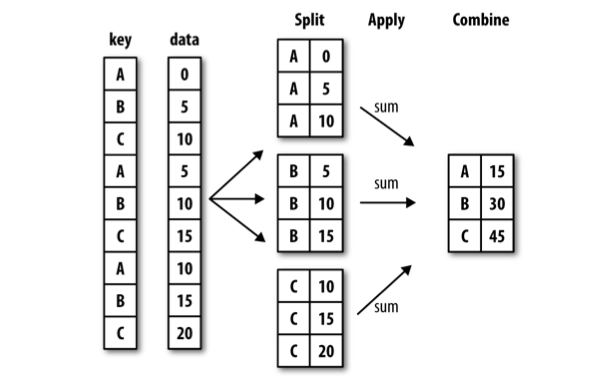

In [ ]:
# 판다스 임포트

import pandas as pd

In [ ]:
# 데이터프레임을 생성하고 df에 대입

df = pd.DataFrame({'key':['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C'],
                   'data':[0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,key,data
0,A,0
1,B,5
2,C,10
3,A,5
4,B,10
5,C,15
6,A,10
7,B,15
8,C,20


* key 값을 기준으로 그루핑하여 data의 합 구하기1
> key 값대로 필터링한후 sum() 함수 적용하면됨

In [ ]:
# 'key'열의 고유값 확인

df['key'].value_counts()

A    3
B    3
C    3
Name: key, dtype: int64

* key값이 'A', 'B', 'C' 세 개가 있고 각각의 키 값에 대해 불린 인덱싱 후 sum() 메소드 적용

In [ ]:
# key 값이 'A'인 데이터를 필터링하고 합구하기

df.loc[df['key'] == 'A'].sum()

key     AAA
data     15
dtype: object

In [ ]:
# key 값이 'B'인 데이터를 필터링하고 합구하기

df.loc[df['key'] == 'B'].sum()

key     BBB
data     30
dtype: object

In [ ]:
# key 값이 'C'인 데이터를 필터링하고 합구하기

df.loc[df['key'] == 'C'].sum()

key     CCC
data     45
dtype: object

* key 값을 기준으로 그루핑하여 data의 합 구하기2
> groupby() 메소드 사용

In [ ]:
# step1) 분할
# 분할된 결과를 df_key변수에 대입

df_key = df.groupby('key')
df_key

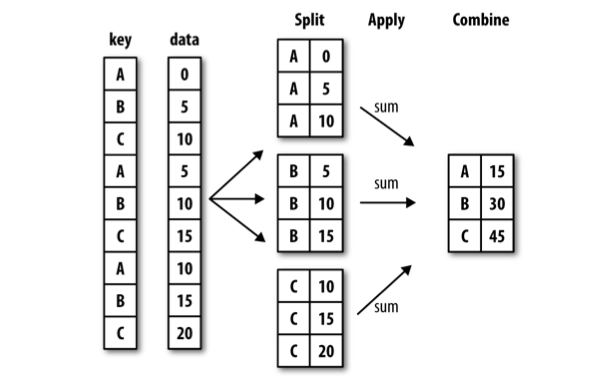

In [ ]:
# 'key'를 기준으로 분할된  df_key내용 확인

for key, group in df_key:
    print('==============')
    print('[key] :', key)
    print('[개수] :', len(group))
    print(group)

[key] : A
[개수] : 3
  key  data
0   A     0
3   A     5
6   A    10
[key] : B
[개수] : 3
  key  data
1   B     5
4   B    10
7   B    15
[key] : C
[개수] : 3
  key  data
2   C    10
5   C    15
8   C    20


In [ ]:
# step 2, 3) 적용및 결합

df_key.sum()

,data
key,
A,15
B,30
C,45


In [ ]:
# step 1, 2, 3)을 한꺼번에 적용하기

df.groupby('key').sum()

,data
key,
A,15
B,30
C,45


## 3.1 그룹객체 만들기(분할 단계)


### 3.1.1 1개 열을 기준으로 그룹화

데이터프레임객체.<b>`groupby(기준이 되는 열)`</b>

- <u>groupby() 메소드는 데이터프레임의 특정 열을 기준으로 데이터프레임을 분할하여 그룹 객체를 반환</u>한다.
- 기준이 되는 열은 1개도 가능하고, 여러 열을 리스트로 입력할 수도 있다.

* seaborn의 'titanic' 데이터셋에서 'class'열을 기준으로하여 그룹으로 나눈다.

In [ ]:
# 라이브러리 불러오기

import pandas as pd
import seaborn as sns

In [ ]:
# titanic데이터셋 불러오기, 변수 titanic에 대입

titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
# titanic 데이터프레임의 처음 5개 행 확인

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# titanic 데이터프레임의 요약정보 확인

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
# 'class'열의 고유데이터와 개수 확인

titanic['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [ ]:
# titanic  데이터셋에서 age, sex, class, fare, survived 열을 선택하여 데이터 프레임 df만들기

df = titanic[['age', 'sex', 'class', 'fare', 'survived']].copy()
df

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0
...,...,...,...,...,...
886,27.0,male,Second,13.0000,0
887,19.0,female,First,30.0000,1
888,NaN,female,Third,23.4500,0
889,26.0,male,First,30.0000,1


In [ ]:
# class 열을 기준으로 분할
# 분할된 결과를 grouped 변수에 대입한다.

grouped = df.groupby('class')
grouped

In [ ]:
# 'class' 열에는 'First', 'Second', 'Third'라는 3개의 값이 들어있다.
# 이 3개의 값을 기준으로 891명의 승객 데이터가 3개의 그룹으로 나뉘어진다.
# 반복문을 이용하여 그룹객체(grouped)의 내용을 출력해서 세개의 그룹이 어떻게 구성되어 있는지 확인한다.

for key, group in grouped:
    print('===============================')
    print('[key] : ', key)
    print('[개수] :', len(group))
    print(group)

[key] :  First
[개수] : 216
      age     sex  class     fare  survived
1    38.0  female  First  71.2833         1
3    35.0  female  First  53.1000         1
6    54.0    male  First  51.8625         0
11   58.0  female  First  26.5500         1
23   28.0    male  First  35.5000         1
..    ...     ...    ...      ...       ...
871  47.0  female  First  52.5542         1
872  33.0    male  First   5.0000         0
879  56.0  female  First  83.1583         1
887  19.0  female  First  30.0000         1
889  26.0    male  First  30.0000         1

[216 rows x 5 columns]
[key] :  Second
[개수] : 184
      age     sex   class     fare  survived
9    14.0  female  Second  30.0708         1
15   55.0  female  Second  16.0000         1
17    NaN    male  Second  13.0000         1
20   35.0    male  Second  26.0000         0
21   34.0    male  Second  13.0000         1
..    ...     ...     ...      ...       ...
866  27.0  female  Second  13.8583         1
874  28.0  female  Second  24.0000 

In [ ]:
# 3개의 그룹으로 나뉘어진 그룹객체(grouped)에 연산 메소드를 적용할 수 있다.
# grouped 객체에 들어 있는 3개 그룹에 대하여 그룹별 평균을 구하기 위하여 mean() 메소드를 적용한다.
# 이때 연산이 가능한 열에 대해서만 선택적으로 연산을 수행한다.

grouped.mean()

# 1 등석의 평균 나이가 38세로 가장 많고, 구조 확률도 63% 정도로 가장 높다는 정보를 얻을 수 있다.

<ipython-input-91-de7578a4be44>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped.mean()


,age,fare,survived
class,,,
First,38.233441,84.154687,0.629630
Second,29.877630,20.662183,0.472826
Third,25.140620,13.675550,0.242363


In [ ]:
# df를 'class'를 기준으로 그루핑하고 평균구하기
# class별로 평균구하기

df.groupby('class').mean()

<ipython-input-93-89a5eccc6848>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('class').mean()


,age,fare,survived
class,,,
First,38.233441,84.154687,0.629630
Second,29.877630,20.662183,0.472826
Third,25.140620,13.675550,0.242363


In [ ]:
df.groupby('class')[['age', 'fare']].max()

,age,fare
class,,
First,80.0,512.3292
Second,70.0,73.5000
Third,74.0,69.5500


In [ ]:
df.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [ ]:
# 그룹객체(grouped)에 get_group()메소드를 적용하면 특정 그룹만을 선택할 수 있다.
# grouped객체의 3개 그룹 중 'Third'인 3등석 승객 데이터를 가진 그룹을 따로 선택하여 추출한다.

df.groupby('class').get_group('Third')

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
2,26.0,female,Third,7.9250,1
4,35.0,male,Third,8.0500,0
5,NaN,male,Third,8.4583,0
7,2.0,male,Third,21.0750,0
...,...,...,...,...,...
882,22.0,female,Third,10.5167,0
884,25.0,male,Third,7.0500,0
885,39.0,female,Third,29.1250,0
888,NaN,female,Third,23.4500,0


### 3.1.2 여러 열을 기준으로 그룹화

데이터프레임객체.<b>`groupby(기준이되는 열의 리스트)`</b>

- 여러 개의 기준 값을 사용하기 때문에 반환되는 그룹 객체의 인덱스는 다중 구조를 갖는다.
- <u>groupby() 메소드에 기준이 되는 여러개의 열을 인자로 전달하면 여러 개의 열이 갖는 원소 값들로 만들 수 있는 모든 조합으로 키를 생성한다. 그리고 조합된 키를 기준으로 그룹 객체를 만든다.</u>

In [ ]:
# 데이터프레임 df를 'class'열, 'sex'열을 기준으로 분할
# 'class'열에는 'First', 'Second', 'Third'라는 3개의 값이 들어 있고
# 'sex' 열에는 'male', 'femail'의 2개의 값이 들어있다.
# 분할된 그룹의 가능한 조합은 ('class', 'sex')형식의 투플로 지정되는데, ('First', 'femaile')을 포함하여 6개의 키가 조합으로 만들어진다.
# 그루핑된 결과는 grouped_two 변수에 대입한다.

grouped_two = df.groupby(['class', 'sex'])
grouped_two

In [ ]:
# grouped_two에 분할된 그룹 확인

for key, group in grouped_two:
    print('=========================')
    print('[key] :', key)
    print('[개수] :', len(group))
    print(group)

[key] : ('First', 'female')
[개수] : 94
      age     sex  class      fare  survived
1    38.0  female  First   71.2833         1
3    35.0  female  First   53.1000         1
11   58.0  female  First   26.5500         1
31    NaN  female  First  146.5208         1
52   49.0  female  First   76.7292         1
..    ...     ...    ...       ...       ...
856  45.0  female  First  164.8667         1
862  48.0  female  First   25.9292         1
871  47.0  female  First   52.5542         1
879  56.0  female  First   83.1583         1
887  19.0  female  First   30.0000         1

[94 rows x 5 columns]
[key] : ('First', 'male')
[개수] : 122
      age   sex  class      fare  survived
6    54.0  male  First   51.8625         0
23   28.0  male  First   35.5000         1
27   19.0  male  First  263.0000         0
30   40.0  male  First   27.7208         0
34   28.0  male  First   82.1708         0
..    ...   ...    ...       ...       ...
839   NaN  male  First   29.7000         1
857  51.0  male  F

In [ ]:
# grouped_two 객체의 각 그룹에 mean()메소드를 적용한다.
# 이때 데이터프레임 객체가 반환되는데, 키가 되는 2개의 열('class', 'sex')의 값으로부터 2중 멀티인덱스가 지정된다.
# 결과를 average_two 변수에 대입한다.

average_two = df.groupby(['class', 'sex']).mean()
average_two

# 여성의 생존율이 남성에 비해 월등히 높다.
# 다만, 3등석 여성 승객의 생존율은 50%에 불과하여, 1,2등석 여성 승객의 90%대 대비 상대적으로 낮다는 사실을 알 수 있다.

age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447

In [ ]:
# averagge_two의 index확인

average_two.index

MultiIndex([( 'First', 'female'),
            ( 'First',   'male'),
            ('Second', 'female'),
            ('Second',   'male'),
            ( 'Third', 'female'),
            ( 'Third',   'male')],
           names=['class', 'sex'])

In [ ]:
# 'class'와 'sex'열을 기준으로 평균구하기

df.groupby(['class', 'sex']).mean()

age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447

In [ ]:
# 멀티인덱스를 이용하여 특정 그룹만 추출할 수 있다.
# get_group()메소드를 활용하는데 인자로 전달하는 키는 투플로 입력한다.

df.groupby(['class', 'sex']).get_group(('Third', 'female'))

,age,sex,class,fare,survived
2,26.0,female,Third,7.9250,1
8,27.0,female,Third,11.1333,1
10,4.0,female,Third,16.7000,1
14,14.0,female,Third,7.8542,0
18,31.0,female,Third,18.0000,0
...,...,...,...,...,...
863,NaN,female,Third,69.5500,0
875,15.0,female,Third,7.2250,1
882,22.0,female,Third,10.5167,0
885,39.0,female,Third,29.1250,0


## 3.2 그룹 연산 메소드(적용-결합단계)

### 3.2.1 데이터 집계

- <u>groupby() 메소드로 분할한 그룹 객체에 대하여 다양한 연산을 적용</u>할 수있다.
- 이 과정을 <u><b>데이터 집계(aggreagation)</b></u>이라고 한다.
- 집계 기능을 내장하고 있는 판다스 기본 함수에는 mean(), max(), min(), sum(), count(), size(), var(), std(), describe(), info(), first(), last() 등이 있다.

In [ ]:
# df확인

df

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0
...,...,...,...,...,...
886,27.0,male,Second,13.0000,0
887,19.0,female,First,30.0000,1
888,NaN,female,Third,23.4500,0
889,26.0,male,First,30.0000,1


In [ ]:
# 'class'열을 기준으로 분할하여 표준편차구하기

df.groupby('class')['fare'].std()

# 1등석의 요금(fare)의 표준편차가 2,3등복다 훨씬 크다.

class
First     78.380373
Second    13.417399
Third     11.778142
Name: fare, dtype: float64

In [ ]:
# 각 그룹에 대한 'fare'열의 표준편차를 집계하여 시리즈로 반환



class
First     78.380373
Second    13.417399
Third     11.778142
Name: fare, dtype: float64

### 3.2.2 모든 열에 여러 함수를 매핑 : group 객체.agg(['함수1', '함수2', '함수3',...])
### 3.2.3 각 열마다 다른 함수를 매핑 : group 객체.agg({'열1':'함수1', '열2':'함수2', ...})

- <u>동시에 여러 개의 함수를 사용하여 각 그룹별 데이터에 대한 집계 연산을 처리</u>할 수 있다
- 각각의 열에 여러 개의 함수를 일괄 적용할 때는 리스트 형태로 인수를 전달하고, 열마다 다른 종류의 함수를 적용하려면 {열:함수}형태의 딕셔너리를 전달한다.

In [ ]:
# 여러 함수를 각 열에 동일하게 적용하여 집계
# 각 열에 2개의 함수('min', 'max')를 일괄 적용하여 그룹별로 집계한다.

df.groupby('class').agg(['min', 'max'])

age           sex       fare           survived    
         min   max     min   max  min       max      min max
class                                                       
First   0.92  80.0  female  male  0.0  512.3292        0   1
Second  0.67  70.0  female  male  0.0   73.5000        0   1
Third   0.42  74.0  female  male  0.0   69.5500        0   1

In [ ]:
# 각 열마다 다른 함수를 적용하여 집계
# 'fare'열에는 2개의 함수('min', 'max')를 적용하고, 'age'열에는 다른 종류의 함수('mean')를 적용하여 집계한다.

df.groupby('class').agg({'fare':['min', 'max'], 'age':'mean'})

fare                  age
        min       max       mean
class                           
First   0.0  512.3292  38.233441
Second  0.0   73.5000  29.877630
Third   0.0   69.5500  25.140620

In [ ]:
a = df.groupby(['class', 'sex']).mean()
a

age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447

In [ ]:
a.index

MultiIndex([( 'First', 'female'),
            ( 'First',   'male'),
            ('Second', 'female'),
            ('Second',   'male'),
            ( 'Third', 'female'),
            ( 'Third',   'male')],
           names=['class', 'sex'])

In [ ]:
a.loc['Second']

,age,fare,survived
sex,,,
female,28.722973,21.970121,0.921053
male,30.740707,19.741782,0.157407


In [ ]:
a.loc[('First', 'female')]

age          34.611765
fare        106.125798
survived      0.968085
Name: (First, female), dtype: float64

In [ ]:
a.iloc[0]

age          34.611765
fare        106.125798
survived      0.968085
Name: (First, female), dtype: float64

In [ ]:
a['fare']

class   sex   
First   female    106.125798
        male       67.226127
Second  female     21.970121
        male       19.741782
Third   female     16.118810
        male       12.661633
Name: fare, dtype: float64

In [ ]:
a[['age', 'survived']]

age  survived
class  sex                        
First  female  34.611765  0.968085
       male    41.281386  0.368852
Second female  28.722973  0.921053
       male    30.740707  0.157407
Third  female  21.750000  0.500000
       male    26.507589  0.135447